# Quantum Circuits
For your first graded code you should enter a code to create
$$\frac{1}{{\sqrt{2}}} (|000\rangle - |101\rangle)$$

For Your second graded code, you should modify return value of circuit() function in order to evaluate expectation value of the first two qubits using PauliZ operator


In [ ]:
! pip install pennylane pennylane-qiskit
import pennylane as qml
from pennylane import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.3/128.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
dev = qml.device("default.qubit", wires=2, shots=1000)
@qml.qnode(dev)
def circuit():
  qml.Hadamard(wires=0)
  qml.CNOT(wires=[0, 1])
  return qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1))
results = circuit()
results[0].shape # or {results[1].shape}

(1000,)

In [ ]:
print(np.mean(results))

0.004


In [ ]:
devtest = qml.device("default.qubit", wires=3)

@qml.qnode(devtest)
def circuit_test():
    qml.Hadamard(wires=0)
    # enter your code here (First graded code)
    qml.PauliZ(wires=0)
    qml.CNOT(wires=[0,2])
    return  qml.state()# enter your code here (Second graded code)

In [ ]:
results_test = circuit_test()
print(results_test)

[ 0.70710678+0.j  0.        +0.j  0.        +0.j  0.        +0.j
 -0.        +0.j -0.70710678+0.j -0.        +0.j -0.        +0.j]


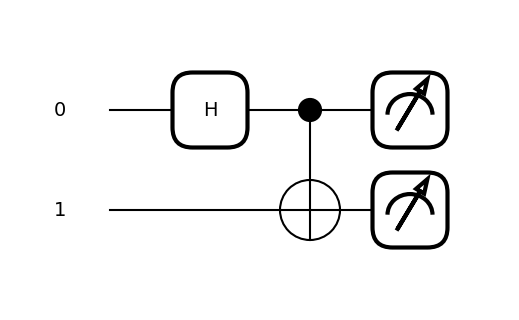

In [ ]:
import matplotlib.pyplot as plt
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(circuit)()
plt.show()

In [ ]:
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    # enter your code here (First graded code)
    qml.PauliZ(wires=0)
    qml.CNOT(wires=[0,2])
    return  qml.expval(qml.PauliZ(0)),qml.expval(qml.PauliZ(1))# enter your code here (Second graded code)

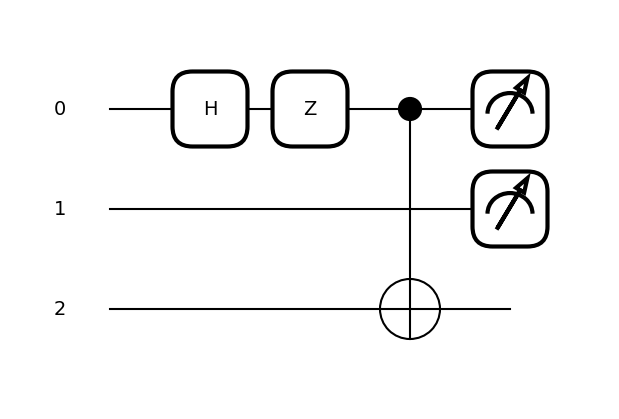

In [ ]:
import matplotlib.pyplot as plt
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(circuit)()
plt.show()

# Parameterized Gates
In this phase of your assignment, you should apply single qubit (Z,Y) rotations to one qubit in order and evaluate the returned values of the defined quantum node

HINT:

1) Please consider the order (Z,Y)             
2) Try to parameterize your Gates using {params[i] for ith parameter}




For your fourth and last graded code in this assignment, you should modify the return value pf parameterized_circuit(params) in order to evaluate the tensor product of observables $Z\otimes Y \otimes X$

HINT:
1) use this pattern as we talked in the class { qml.expval(PauliZ(...) @ ...) }

In [ ]:
dev2 = qml.device("default.qubit", wires=1)

@qml.qnode(dev2)
def parameterized_circuit(params):
    # enter your code here (Third graded code)
    qml.RZ(params[0],wires=0)
    qml.RY(params[1],wires=0)
    return  qml.expval(qml.PauliZ(0)@qml.PauliY(0)@qml.PauliX(0)) # enter your code here (Fourth graded code)

/usr/local/lib/python3.10/dist-packages/pennylane/operation.py:1945: UserWarning: Tensor object acts on overlapping wires; in some PennyLane functions this will lead to undefined behaviour
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pennylane/operation.py:2141: UserWarning: Tensor object acts on overlapping wires; in some PennyLane functions this will lead to undefined behaviour
  warnings.warn(


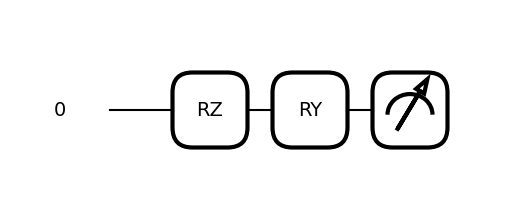

In [ ]:
params=np.random.rand(3)
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(parameterized_circuit)(params)
plt.show()

Cell below will initialize the parameters of the  parameterized_circuit and compute the the returned value of the function.
one can notice ,due to the random initialization, the mentioned value will be differernt during each cell run.

In [ ]:
params=np.random.rand(3)
parameterized_circuit(params)

/usr/local/lib/python3.10/dist-packages/pennylane/operation.py:1945: UserWarning: Tensor object acts on overlapping wires; in some PennyLane functions this will lead to undefined behaviour
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pennylane/operation.py:2141: UserWarning: Tensor object acts on overlapping wires; in some PennyLane functions this will lead to undefined behaviour
  warnings.warn(


tensor(0.98723065, requires_grad=True)